# AUTHOR: Simran Sharma

# The Sparks Foundation

# GripOCTOBER21


# Task-2  Prediction Using Unsupervised ML
Level - Beginner

The task is to predict the optimum number of clusters from the Iris Dataset and represent it visually.


# __Importing relevant libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# __Loading the dataset__

In [2]:
 data=pd.read_csv(r'C:\Users\Simran\Downloads\Iris (1).csv')
print(data.iloc[:,[1,2,3,4,5]])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# __Visualizing the data using pandas’ andrew curves :__

Andrews curves have the functional form:
f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) +x_4 sin(2t) + x_5 cos(2t) + …
Where x coefficients correspond to the values of each dimension and t is linearly spaced between -pi and +pi. Each row of the frame then corresponds to a single curve

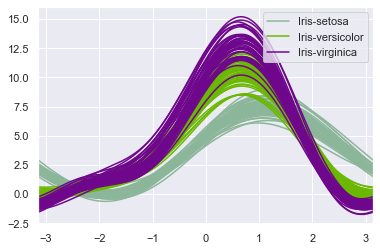

In [18]:
from pandas.plotting import andrews_curves
andrews_curves(data.drop("Id", axis=1), "Species")
plt.grid()
plt.show()


# __Visualizing the data using Scatter Plots__

Text(0, 0.5, 'SepalWidthCm')

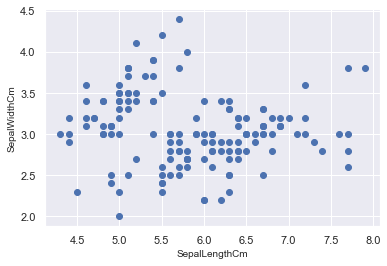

In [5]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
plt.xlabel("SepalLengthCm",fontsize=10)
plt.ylabel("SepalWidthCm",fontsize=10)

Text(0, 0.5, 'PetalWidthCm')

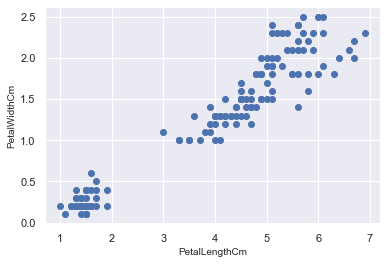

In [6]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.xlabel("PetalLengthCm",fontsize=10)
plt.ylabel("PetalWidthCm",fontsize=10)

Text(0, 0.5, 'PetalLengthCm')

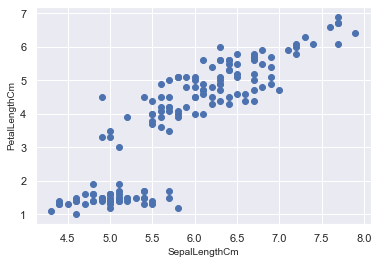

In [7]:
plt.scatter(data['SepalLengthCm'],data['PetalLengthCm'])
plt.xlabel("SepalLengthCm",fontsize=10)
plt.ylabel("PetalLengthCm",fontsize=10)

Text(0, 0.5, 'SepalWidthCm')

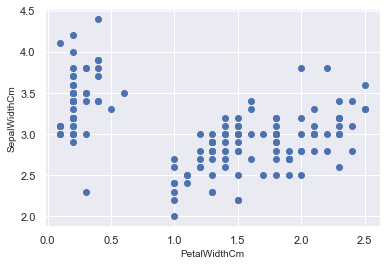

In [8]:
plt.scatter(data['PetalWidthCm'],data['SepalWidthCm'])
plt.xlabel("PetalWidthCm",fontsize=10)
plt.ylabel("SepalWidthCm",fontsize=10)

In [9]:
x = data.iloc[:,[1,2,3,4]].values 



 # __Using WCSS and Elbow Method :__

__To find the number of clusters to be selected__

In  'The elbow method', the optimum clusters is where the elbow occurs in the graph. This is the point after which within the cluster, WCSS)doesn't decrease significantly with every iteration.

From this,  the number of clusters selected is '3'

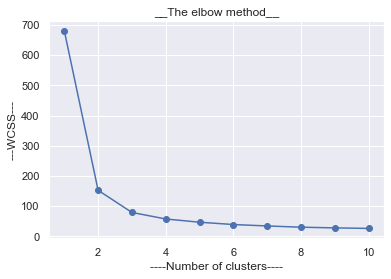

In [10]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, and observe 'The elbow'
plt.plot(range(1, 11), wcss,marker='o')
plt.title('__The elbow method__')
plt.xlabel('----Number of clusters----')
plt.ylabel('---WCSS---') 
plt.show()

 # __Applying Kmeans classifier__ 

In [11]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 300, n_init = 10, random_state = 0) 
M = kmeans.fit_predict(x)


# __Displaying cluster centers__

In [12]:
print(kmeans.cluster_centers_) 

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


# __Visualising the clusters__ & __Plotting the centroids of the clusters__

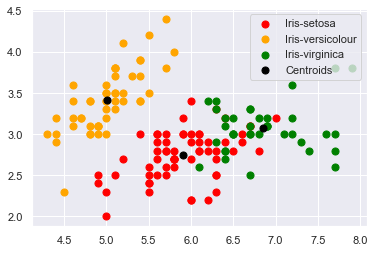

In [16]:
plt.scatter(x[M   == 0, 0], x[M == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[M   == 1, 0], x[M == 1, 1],s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[M   == 2, 0], x[M == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')  
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 50, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()


# __Conclusion__
Successful Implementation of  the task is done.
